In [1]:
DEBUG=False

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from nn_wrapper import NeuralNetworkWrapper
import numpy as np
from sklearn.metrics import accuracy_score
import optimizers

# Importing and cleaning MNIST dataset

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

if DEBUG:
    X = X[:1000, :]
    y = y[:1000, :]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Training neural network

Loss after 1 epochs: 0.408
Loss after 2 epochs: 0.300
Loss after 3 epochs: 0.253
Loss after 4 epochs: 0.223
Loss after 5 epochs: 0.201
Loss after 6 epochs: 0.184
Loss after 7 epochs: 0.170
Loss after 8 epochs: 0.158
Loss after 9 epochs: 0.147
Loss after 10 epochs: 0.138
Final loss: 0.138


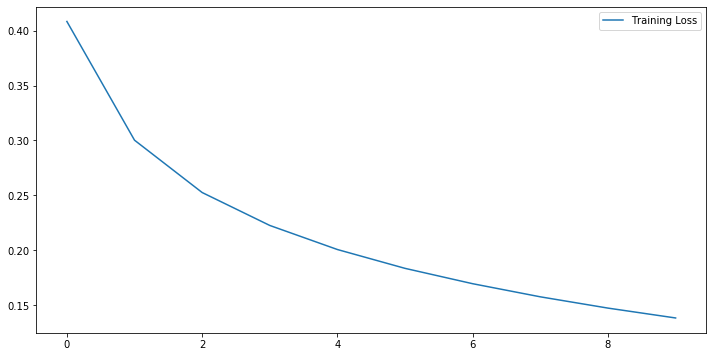

Accuracy on test set: 0.9451428571428572


In [6]:
NN1 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.Optimizer(),
                          128)
NN1.train(X_train,
          y_train,
          10,
          0)
NN1.plot_loss()

y_hat = NN1.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit with validation split

Loss after 1 epochs: 0.438
Loss after 2 epochs: 0.321
Loss after 3 epochs: 0.271
Loss after 4 epochs: 0.240
Loss after 5 epochs: 0.218
Loss after 6 epochs: 0.201
Loss after 7 epochs: 0.186
Loss after 8 epochs: 0.174
Loss after 9 epochs: 0.164
Loss after 10 epochs: 0.154
Final loss: 0.154


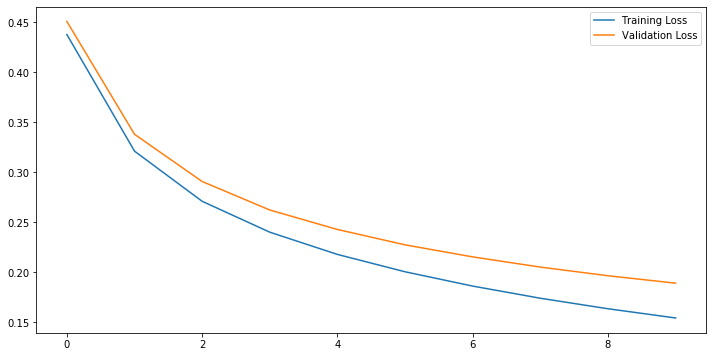

Accuracy on test set: 0.9430714285714286


In [7]:
NN1 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.Optimizer(),
                          128)
NN1.train(X_train,
          y_train,
          10,
          0.1)
NN1.plot_loss()

y_hat = NN1.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit without bias

Loss after 1 epochs: 0.441
Loss after 2 epochs: 0.310
Loss after 3 epochs: 0.254
Loss after 4 epochs: 0.220
Loss after 5 epochs: 0.196
Loss after 6 epochs: 0.178
Loss after 7 epochs: 0.164
Loss after 8 epochs: 0.152
Loss after 9 epochs: 0.142
Loss after 10 epochs: 0.133
Final loss: 0.133


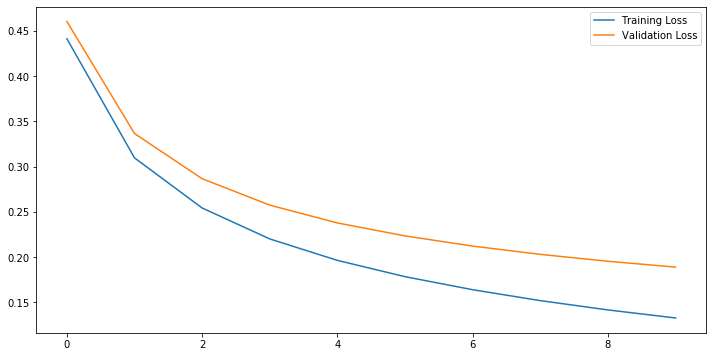

Accuracy on test set: 0.9465


In [8]:
NN2 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.Optimizer(),
                          128,
                          bias=False)
NN2.train(X_train,
          y_train,
          10,
          0.1)
NN2.plot_loss()

y_hat = NN2.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Gradient Descent with momentum

Loss after 1 epochs: 0.416
Loss after 2 epochs: 0.310
Loss after 3 epochs: 0.262
Loss after 4 epochs: 0.232
Loss after 5 epochs: 0.210
Loss after 6 epochs: 0.193
Loss after 7 epochs: 0.179
Loss after 8 epochs: 0.167
Loss after 9 epochs: 0.157
Loss after 10 epochs: 0.148
Final loss: 0.148


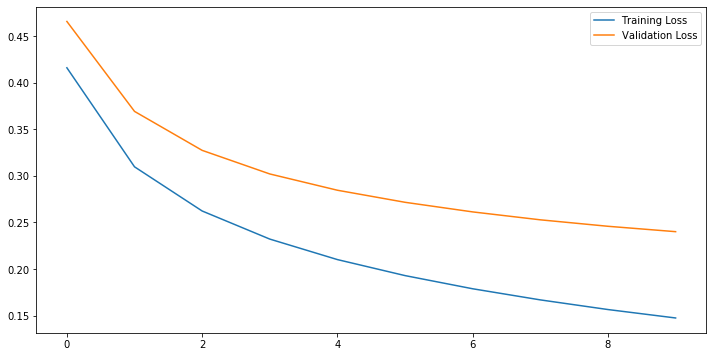

Accuracy on test set: 0.9442142857142857


In [13]:
NN3 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.GDwithMomentum(momentum_ratio=0.8),
                          128)
NN3.train(X_train,
          y_train,
          10,
          0.1)
NN3.plot_loss()

y_hat = NN3.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')